# Importing Packages

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Stratified Random Partitioning

When dividing a dataset into training/test or training/test/validation sets, the original class distributions should be preserved.


In [2]:
cancer = pd.read_csv('cancer.csv')
cancer.y.value_counts()

benign       444
malignant    239
Name: y, dtype: int64

In [3]:
cancer_ben = cancer.loc[np.where(cancer.y=="benign")[0],:]
cancer_mal = cancer.loc[np.where(cancer.y=="malignant")[0],:]

cancer_ben = cancer_ben.sample(frac=1)
cancer_mal = cancer_mal.sample(frac=1)

n_cancer_ben = cancer_ben.shape[0]
n_cancer_mal = cancer_mal.shape[0]

cancer_ben_train = cancer_ben.iloc[np.arange(int(np.round(n_cancer_ben*0.7))),:]
cancer_ben_test = cancer_ben.iloc[np.arange(int(np.round(n_cancer_ben*0.7))+1,n_cancer_ben),:]

cancer_mal_train = cancer_mal.iloc[np.arange(int(np.round(n_cancer_mal*0.7))),:]
cancer_mal_test = cancer_mal.iloc[np.arange(int(np.round(n_cancer_mal*0.7))+1,n_cancer_mal),:]

cancer_tarin = pd.concat([cancer_ben_train,cancer_mal_train])
cancer_test = pd.concat([cancer_ben_test,cancer_mal_test])

print(cancer_tarin.y.value_counts())
print()
print(cancer_test.y.value_counts())

benign       311
malignant    167
Name: y, dtype: int64

benign       132
malignant     71
Name: y, dtype: int64


# ROC Analysis

In [4]:
# example 1 ------------------------------------------------------ #
# drawing roc curve 
label = ['P', 'P', 'N', 'P', 'P', 'P', 'N', 'N', 'P', 'N', 'P', 
         'N', 'P', 'N', 'N', 'N', 'P', 'N', 'P', 'N']
score = [0.9, 0.8, 0.7, 0.6, 0.55, 0.51, 0.49, 0.43, 
           0.42, 0.39, 0.33, 0.31, 0.23, 0.22, 0.19, 
           0.15, 0.12, 0.11, 0.04, 0.01]

In [5]:
fpr, tpr, thresholds = roc_curve(y_true=label,y_score=score,pos_label='P')
roc_auc = auc(fpr, tpr)

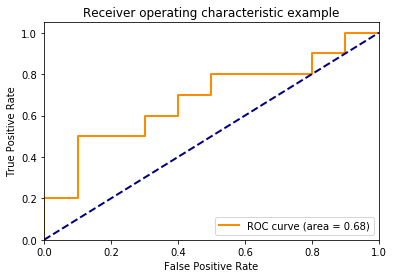

In [6]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Climate Model Simulation Crashes Data

+ This dataset contains records of simulation crashes encountered during climate model uncertainty quantification (UQ) ensembles.
+ 494 successes and 46 failures (Imbalance Ratio 1/10.7)
+ 18 continuous predictor variables, all scaled between 0 and 1

In [7]:
# example 2 ------------------------------------------------------ #
from sklearn.naive_bayes import GaussianNB

dt = pd.read_csv('climate_sim.csv.')

X = np.array(dt.loc[:, dt.columns != 'y'])
y = np.array(dt.y)

gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
y_pred = gnb.predict_proba(X)
confusion_matrix((y=='failure')*1,np.round(y_pred[:,0]))

array([[492,   2],
       [ 20,  26]], dtype=int64)

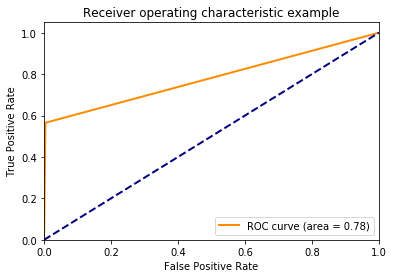

In [9]:
fpr, tpr, thresholds = roc_curve(y_true=y,y_score=np.round(y_pred[:,0]),pos_label='failure')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

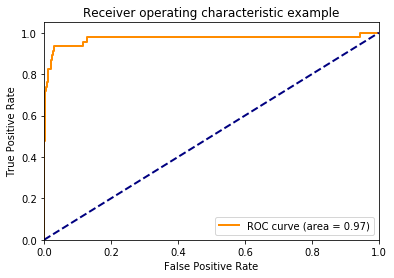

In [10]:
fpr, tpr, thresholds = roc_curve(y_true=y,y_score=y_pred[:,0],pos_label='failure')
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()